# Creating SVG file using blockdiag

blockdiag http://blockdiag.com/en/blockdiag/introduction.html を使ってSVGを生成する例です。

## requirements

`~/.local/bin/blockdiag`としてツールをインストールします。

In [1]:
!pip install blockdiag --user

     |████████████████████████████████| 2.7MB 164kB/s eta 0:00:01    |█████▌                          | 471kB 94kB/s eta 0:00:24     |█████████████████               | 1.4MB 310kB/s eta 0:00:05
  Created wheel for funcparserlib: filename=funcparserlib-0.3.6-cp37-none-any.whl size=17449 sha256=0a6d0b14ad35144c78572bf6f2776e74af91338e44cbdc9c88cae8184447d080
  Stored in directory: /home/jovyan/.cache/pip/wheels/03/eb/48/ade4df39d3eb30e31518e91e4ee0572ca6c1292a94f782f9da
Successfully built funcparserlib
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## generate SVG

`.diag`スクリプトを記述し、`blockdiag`を実行します。

In [2]:
import tempfile
work_dir = tempfile.mkdtemp()
work_dir

'/tmp/tmpruxec1xx'

In [3]:
%%writefile {work_dir}/example.diag
{
  node_width=200;
  span_height=20;
  span_width=150;
  default_fontsize=18;

  group all_files { color="#FFFFFF"; shape="line";
    head_left [textcolor="red", style="dotted", width=300, fontsize=16, label="Files in the current directory"];
    group { color="#8FEFEF"; shape="line";
      group { color="#AFEFEF";
        "Notebook 1.ipynb" [shape="note", height=100]; 
        "..." [shape = "dots", height=5]; 
        "Notebook N.ipynb" [shape="note", height=100]; 
      }

    README.svg [shape ="note", height=100];
    README.md [shape ="note", height=100];
    }
  }


  group view { color="#FFFFFF"; shape="line";
    head_right [textcolor="red", style="dotted", width=400, fontsize=16,label="SVG diagram on top and Markdown at bottom"];
    group {color="#CCCCFF"; shape="line";
      SVG [shape="ellipse", height=150, label="SVG Diagram"];
      space_v1 [shape="none"];
      list1 [label="File List View", height=150]; 
      space_v2 [shape="none"];
      Markdown [height=200, label="Markdown View"]; 
    }
  }

  head_left -> head_right [style="none"];
  "..." -> list1;
  README.svg -> SVG [style="10,3,5,3"];
  README.md -> Markdown;
}

Writing /tmp/tmpruxec1xx/example.diag


In [4]:
!~/.local/bin/blockdiag -Tsvg {work_dir}/example.diag -o ./example.svg

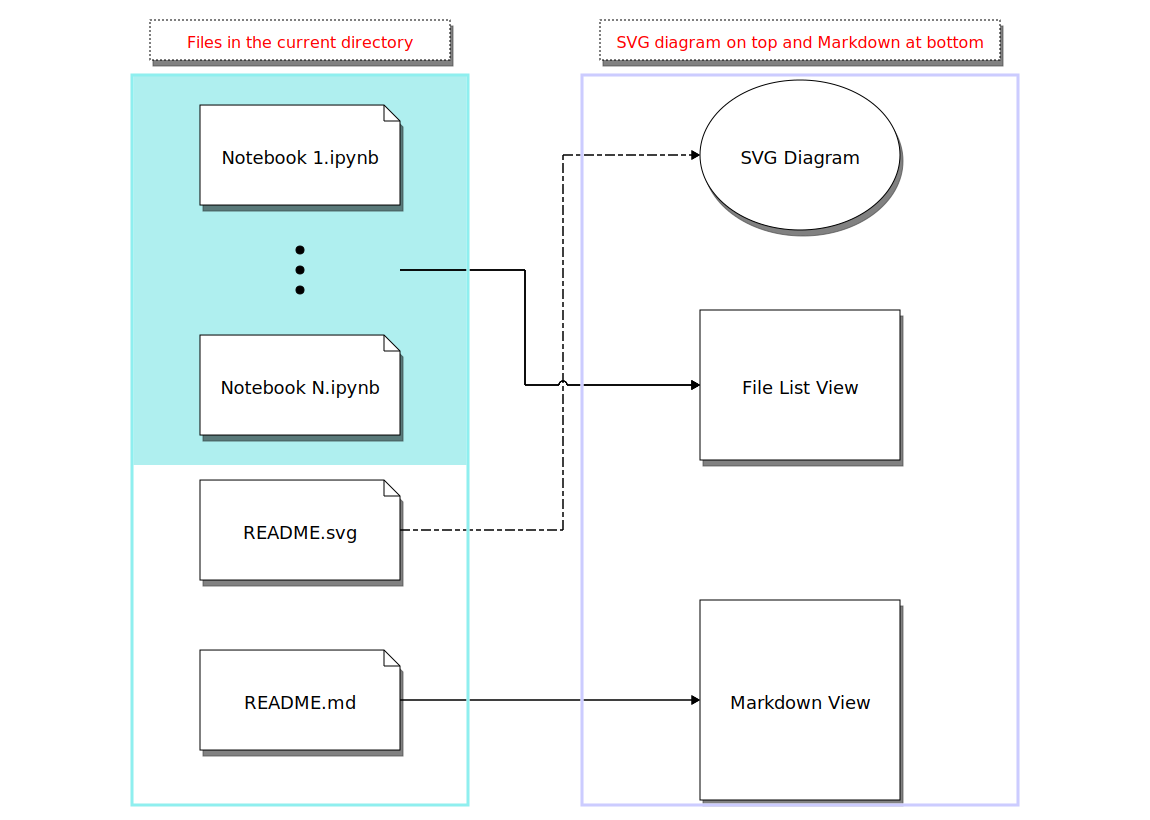

In [5]:
from IPython.display import SVG
SVG('./example.svg')